In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
ranking = pd.read_csv('chess-fide-ranking.csv')
ranking.head()

,rank,name,ELO,title,federation,games,birth_year
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990
1,2,Liren Ding,2806,GM,China,1630,1992
2,3,Alireza Firouzja,2793,GM,France,845,2003
3,4,Fabiano Caruana,2783,GM,United States,2622,1992
4,5,Levon Aronian,2775,GM,United States,3320,1982


* Consertando possíveis espaços nos nomes das colunas.

In [15]:
ranking.columns = ['rank', 'name', 'ELO', 'title', 'federation', 'games', 'birth_year']

* Média geral rating

In [16]:
ranking.ELO.mean()

2662.385

* Média por federação

In [23]:
mean_by_federation = ranking.groupby('federation').ELO.mean().to_frame().reset_index()
mean_by_federation.columns = ['Country', 'Rating_mean']
mean_by_federation.index += 1
mean_by_federation.head(3)

,Country,Rating_mean
1,Argentina,2652.000000
2,Armenia,2641.444444
3,Austria,2647.000000


* Quantidade de Jogadores por país

In [47]:
players_by_nation = ranking.federation.value_counts().to_frame().reset_index()
players_by_nation.columns = ['Country', 'Players']
players_by_nation.Country = players_by_nation.Country
players_by_nation.index += 1
players_by_nation.head(3)

,Country,Players
1,Russian Federation,22
2,United States,19
3,NaN,17


In [43]:
np.size(ranking.federation.unique())

43

<AxesSubplot:xlabel='Country', ylabel='Players'>

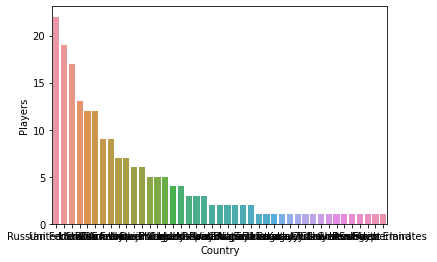

In [46]:
sns.barplot(x='Country', y='Players', data=players_by_nation)